In [31]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
import cv2
import time

In [32]:
path = '/content/drive/MyDrive/currency'

In [33]:
n,m = 256,128

In [34]:
data = []
for img in os.listdir(path):
    img = cv2.imread(os.path.join(path,img))
    if img is not None:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to gray image
        resize_img = cv2.resize(gray_img, (n,m)) # Resize to 256x128
        data.append(resize_img)

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#sym = {0:'100', 1:'100', 2:'200', 3:'20', 4:'500', 5:'50', 6:'Old 100', 7:'Old 10', 8:'Old 20', 9:'Old 50'}
sym = {0:'500', 1:'Old 20', 2:'50', 3:'100',4:'200',5:'20',6:'Old 10',7:'Old 100',8:'Old 50',9:'100'}

In [41]:
X = np.array(data)
X = X.reshape(X.shape[0],n*m)
X = X/255.0
Y = np.array([[i] for i in range(10)]).flatten()
X.shape, len(Y)

((10, 32768), 10)

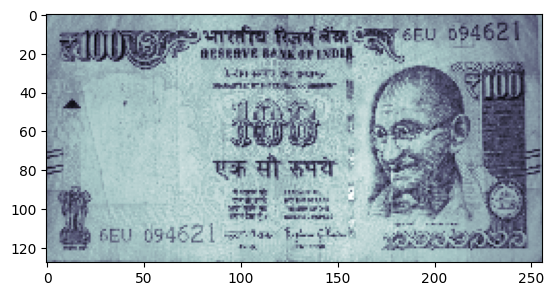

In [38]:
plt.imshow(X[9].reshape(m,n), cmap=plt.cm.bone)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((8, 32768), (2, 32768), (8,), (2,))

In [43]:
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
import tensorflow
tensorflow.random.set_seed(0)
from numpy.random import seed
seed(0)

In [44]:
Y_train = to_categorical(Y_train)
Y_train.shape, X_train.shape

((8, 10), (8, 32768))

In [49]:
NN = models.Sequential()
NN.add(layers.Dense(1024, activation = 'tanh', input_shape = (X_train.shape[1],)))
NN.add(layers.Dense(512, activation = 'relu'))
NN.add(layers.Dense(256, activation = 'relu'))
NN.add(layers.Dense(10, activation = 'Softmax'))

In [50]:
NN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              33555456  
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 34,214,154
Trainable params: 34,214,154
Non-trainable params: 0
_________________________________________________________________


In [51]:
NN.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
start = time.time()
NN.fit(X_train, Y_train, epochs = 150, batch_size=15)
nn_time = time.time() - start

Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 2.4746 - accuracy: 0.0000e+00
Epoch 2/150
1/1 [==============================] - 0s 418ms/step - loss: 3.2104 - accuracy: 0.1250
Epoch 3/150
1/1 [==============================] - 0s 414ms/step - loss: 8.6259 - accuracy: 0.1250
Epoch 4/150
1/1 [==============================] - 0s 415ms/step - loss: 6.3074 - accuracy: 0.1250
Epoch 5/150
1/1 [==============================] - 0s 419ms/step - loss: 4.6310 - accuracy: 0.1250
Epoch 6/150
1/1 [==============================] - 0s 404ms/step - loss: 5.2508 - accuracy: 0.1250
Epoch 7/150
1/1 [==============================] - 0s 440ms/step - loss: 4.0015 - accuracy: 0.1250
Epoch 8/150
1/1 [==============================] - 0s 425ms/step - loss: 2.4260 - accuracy: 0.1250
Epoch 9/150
1/1 [==============================] - 0s 441ms/step - loss: 2.2000 - accuracy: 0.1250
Epoch 10/150
1/1 [==============================] - 0s 435ms/step - loss: 2.1538 - accuracy: 0.1250
Epoch 11

In [53]:
pred_nn = NN.predict(X_val)

1/1 [==============================] - 0s 185ms/step


In [54]:
predict_nn = [np.argmax(pred_nn[i], axis = -1) for i in range(X_val.shape[0])]

In [55]:
actual = [f'{sym[i]} Rupees' for i in Y_val]
pred = [f'{sym[i]} Rupees' for i in predict_nn]


In [56]:
pd.DataFrame(zip(actual, pred), columns = ['Actual', 'Predicted'])

,Actual,Predicted
0,50 Rupees,Old 20 Rupees
1,Old 50 Rupees,Old 20 Rupees


In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [58]:
confusion_matrix(predict_nn, Y_val)

array([[0, 1, 1],
       [0, 0, 0],
       [0, 0, 0]])

In [59]:
print(classification_report(Y_val, predict_nn))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [60]:
Y_val = to_categorical(Y_val)

In [61]:
val_loss, val_acc = NN.evaluate(X_val, Y_val)
print(f'ACCURACY : {val_acc}, \nLOSS : {val_loss}')

ValueError: ignored

In [62]:
from sklearn.decomposition import PCA

In [63]:
def evaluate(components, eigenValues, eigenVectors, df):
    weightage = {}

    col = ['PC'+ str(i+1) for i in range(components.shape[1])]
    transform = pd.DataFrame(components, columns = col)
    #display(transform)

    var = eigenValues/sum(eigenValues)
    for i in range(1,len(var)+1):
        if sum(var[:i])>=0.9:
            no_of_pc = i
            break
    print(f'\n{no_of_pc} components explains 90% or more variability')

    for i in range(no_of_pc):
        top_n = np.argsort( abs(eigenVectors[i]) )[::-1][:4] # shows top 4 affecting features
        weightage['PC'+str(i+1)] = [str(round(abs(eigenVectors[i][j]),4)) for j in top_n]

    impact = pd.DataFrame.from_dict(weightage, orient='index')
    impact['Eigen Values'] = eigenValues[:no_of_pc]
    impact['Variability (%)'] = var[:no_of_pc]
    impact['Cummulative Variability (%)'] = [sum(var[:i]) for i in range(1,no_of_pc+1)]
    #display(impact)
    return transform, impact, no_of_pc

In [64]:
def PCA_lib(df):
    pca = PCA()
    pca.fit(df)
    eigenVectors = pca.components_.T
    eigenValues = pca.explained_variance_
    components = pca.transform(df)
    return pca, components, eigenValues, eigenVectors

In [65]:
pca, components, eigenValues, eigenVectors = PCA_lib(X)

In [66]:
X_pca, impact, no_of_pc = evaluate(components, eigenValues, eigenVectors, X)


6 components explains 90% or more variability


In [67]:
X.shape, X_pca.shape, Y.shape

((10, 32768), (10, 10), (10,))

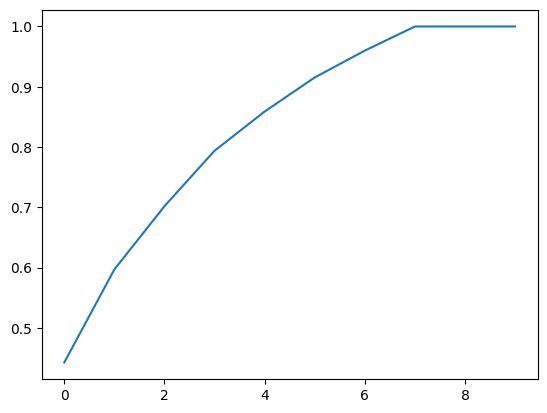

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

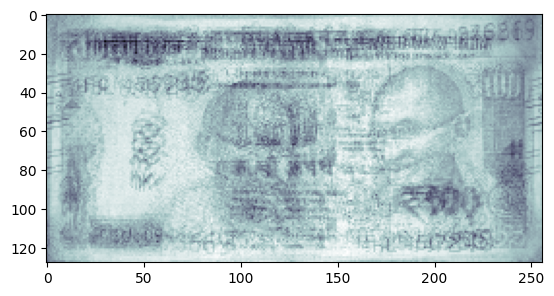

In [69]:
plt.imshow(pca.mean_.reshape(m,n),cmap=plt.cm.bone)

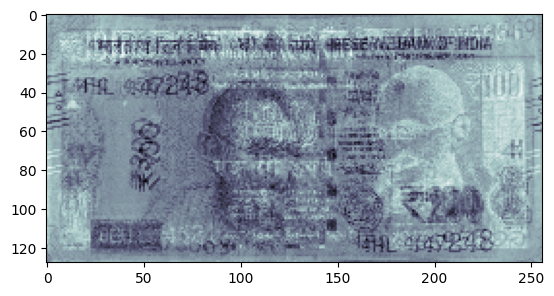

In [70]:
plt.imshow(eigenVectors.T[0].reshape(m,n),cmap=plt.cm.bone)

In [71]:
projected_train = pca.fit_transform(X)
projected_train.shape

(10, 10)

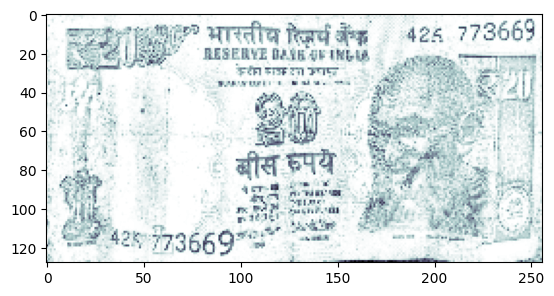

In [72]:
inv_proj = pca.inverse_transform(projected_train)
plt.imshow(inv_proj[3].reshape(m,n),cmap=plt.cm.bone)

In [73]:
X_pca_train, X_pca_val, Y_train, Y_val = train_test_split(X_pca, Y, test_size = 0.2, random_state = 0)
X_pca_train.shape, X_pca_val.shape, Y_train.shape, Y_val.shape

((8, 10), (2, 10), (8,), (2,))

In [74]:
Y_train = to_categorical(Y_train)
Y_train.shape, X_pca_train.shape

((8, 10), (8, 10))

In [79]:
NN_pca = models.Sequential()
NN_pca.add(layers.Dense(1024, activation = 'tanh', input_shape = (X_pca_train.shape[1],)))
NN_pca.add(layers.Dense(512, activation = 'relu'))
NN_pca.add(layers.Dense(256, activation = 'relu'))
NN_pca.add(layers.Dense(10, activation = 'Softmax'))

In [76]:
NN_pca.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              11264     
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 668,677
Trainable params: 668,677
Non-trainable params: 0
_________________________________________________________________


In [82]:
NN_pca.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [83]:
start = time.time()
NN_pca.fit(X_pca_train, Y_train, epochs = 150, batch_size=15)
nn_pca_time = time.time()-start

Epoch 1/150
1/1 [==============================] - 1s 621ms/step - loss: 2.3506 - accuracy: 0.0000e+00
Epoch 2/150
1/1 [==============================] - 0s 24ms/step - loss: 0.1856 - accuracy: 0.8750
Epoch 3/150
1/1 [==============================] - 0s 21ms/step - loss: 1.6703 - accuracy: 0.8750
Epoch 4/150
1/1 [==============================] - 0s 17ms/step - loss: 0.8075 - accuracy: 0.8750
Epoch 5/150
1/1 [==============================] - 0s 18ms/step - loss: 0.4605 - accuracy: 0.8750
Epoch 6/150
1/1 [==============================] - 0s 18ms/step - loss: 0.3304 - accuracy: 0.8750
Epoch 7/150
1/1 [==============================] - 0s 19ms/step - loss: 0.3022 - accuracy: 0.8750
Epoch 8/150
1/1 [==============================] - 0s 21ms/step - loss: 0.2567 - accuracy: 0.8750
Epoch 9/150
1/1 [==============================] - 0s 27ms/step - loss: 0.2182 - accuracy: 0.8750
Epoch 10/150
1/1 [==============================] - 0s 17ms/step - loss: 0.2032 - accuracy: 0.8750
Epoch 11/150
1

In [84]:
pred_nn_pca = NN_pca.predict(X_pca_val)

1/1 [==============================] - 0s 102ms/step


In [85]:
predict_nn_pca = [np.argmax(pred_nn_pca[i], axis = -1) for i in range(X_pca_val.shape[0])]

In [86]:
actual_pca = [f'{sym[i]} Rupees' for i in Y_val]
pred_pca = [f'{sym[i]} Rupees' for i in predict_nn_pca]

In [87]:
pd.DataFrame(zip(actual_pca, pred_pca), columns = ['Actual', 'Predicted'])

,Actual,Predicted
0,50 Rupees,100 Rupees
1,Old 50 Rupees,100 Rupees


In [88]:
confusion_matrix(predict_nn_pca, Y_val)

array([[0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0]])

In [89]:
print(classification_report(Y_val, predict_nn_pca))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [90]:
Y_val = to_categorical(Y_val)

In [91]:
val_loss_pca, val_acc_pca = NN_pca.evaluate(X_pca_val, Y_val)
print(f'ACCURACY : {val_acc_pca}, \nLOSS : {val_loss_pca}')

ValueError: ignored

In [92]:
nn_time = str(round(nn_time,2)) + ' sec'
nn_pca_time = str(round(nn_pca_time,2)) + ' sec'

In [93]:
pd.DataFrame([[val_acc, val_loss, nn_time],[val_acc_pca, val_loss_pca, nn_pca_time]], columns = ['Accuracy', 'Loss', 'Time Taken'], index = ['Without PCA', 'With PCA'])

NameError: ignored

In [96]:
path = '/content/drive/MyDrive/currency'

In [97]:
test_data = []
for img in os.listdir(path):
    img = cv2.imread(os.path.join(path,img))
    if img is not None:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to gray image
        resize_img = cv2.resize(gray_img, (n,m)) # Resize to 256x128
        test_data.append(resize_img)

In [98]:
X_test = np.array(test_data)
X_test = X_test.reshape(X_test.shape[0],n*m)
X_test = X_test/255.0
Y_test = [1,0,3,2,5,4,7,6,8,9]
X_test.shape, len(Y_test)

((10, 32768), 10)

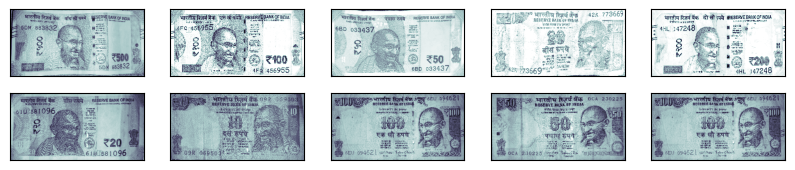

In [99]:
fig = plt.figure(figsize=(10,2))
# plot several images
for i in range(X_test.shape[0]):
    ax = fig.add_subplot(2,5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(m,n), cmap=plt.cm.bone)

In [100]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(10, 10)

In [101]:
pred_test = NN_pca.predict(X_test_pca)

1/1 [==============================] - 0s 77ms/step


In [102]:
predict_test = [np.argmax(pred_test[i], axis = -1) for i in range(X_test_pca.shape[0])]

In [104]:
actual_test = [f'{sym[i]} Rupees' for i in Y_test]
pred_test = [f'{sym[i]} Rupees' for i in predict_test]

In [105]:
pd.DataFrame(zip(actual_test, pred_test), columns = ['Actual', 'Predicted'])

,Actual,Predicted
0,Old 20 Rupees,500 Rupees
1,500 Rupees,Old 20 Rupees
2,100 Rupees,100 Rupees
3,50 Rupees,100 Rupees
4,20 Rupees,200 Rupees
5,200 Rupees,20 Rupees
6,Old 100 Rupees,Old 10 Rupees
7,Old 10 Rupees,100 Rupees
8,Old 50 Rupees,100 Rupees
9,100 Rupees,100 Rupees


In [106]:
Y_test = to_categorical(Y_test)

In [107]:
test_loss, test_acc = NN_pca.evaluate(X_test_pca, Y_test)
print(f'ACCURACY : {test_acc}, \nLOSS : {test_loss}')

1/1 [==============================] - 0s 154ms/step - loss: 10.8379 - accuracy: 0.2000
ACCURACY : 0.20000000298023224, 
LOSS : 10.837928771972656
